In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
transactions_df = pd.read_csv('Transactions.csv')
products_df = pd.read_csv('Products.csv')
customers_df = pd.read_csv('Customers.csv')

# Convert date columns to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Merge dataframes for analysis
sales_analysis = transactions_df.merge(products_df, on='ProductID')
full_analysis = sales_analysis.merge(customers_df, on='CustomerID')

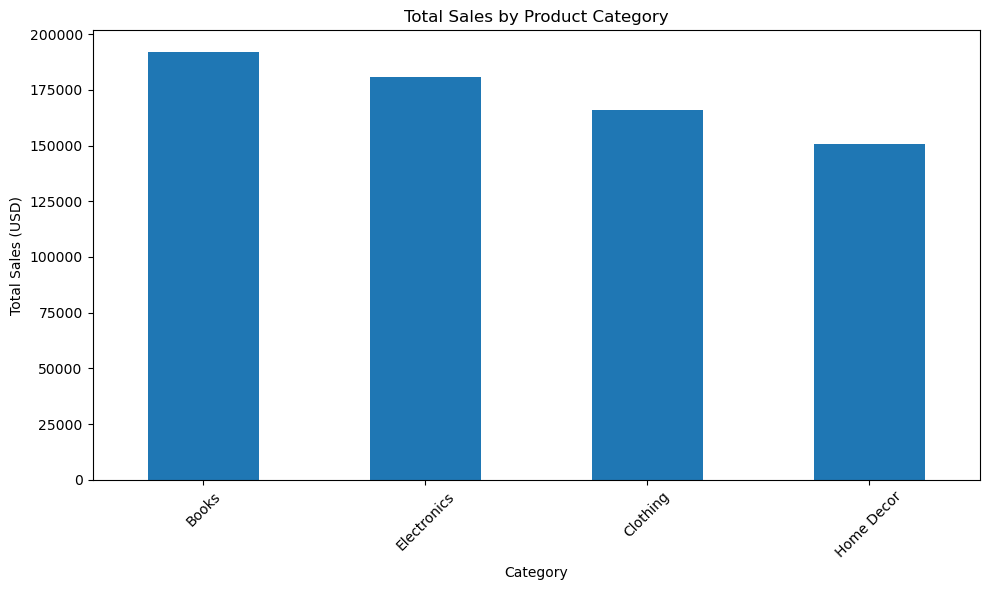

In [3]:
# 1. Sales by Category
category_sales = sales_analysis.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

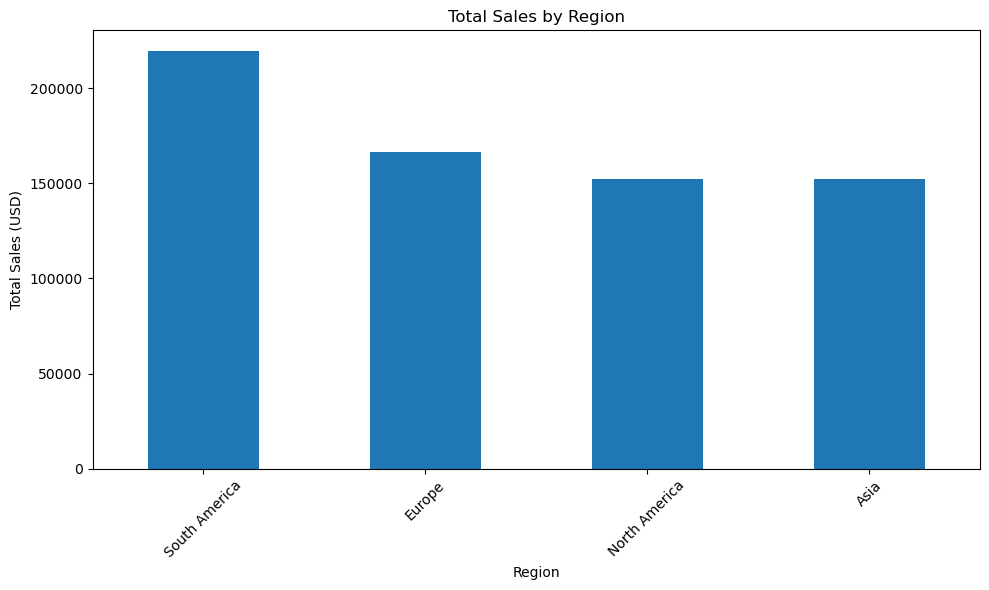

In [4]:
# 2. Regional Analysis
regional_sales = full_analysis.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
regional_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


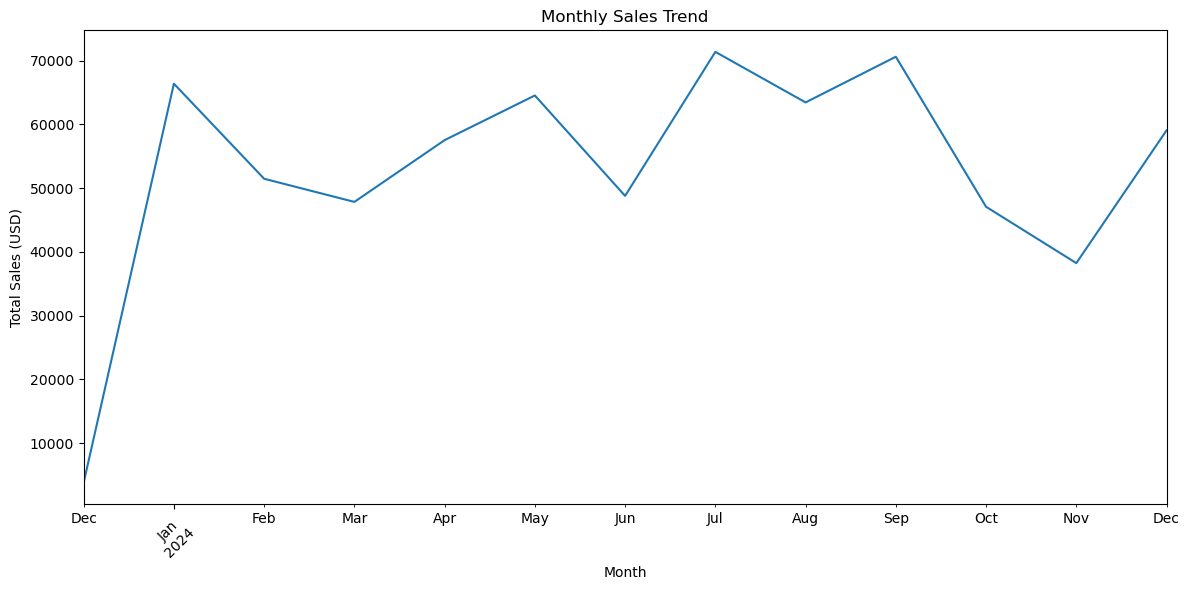

In [5]:
# 3. Monthly Sales Trend
monthly_sales = full_analysis.groupby(full_analysis['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

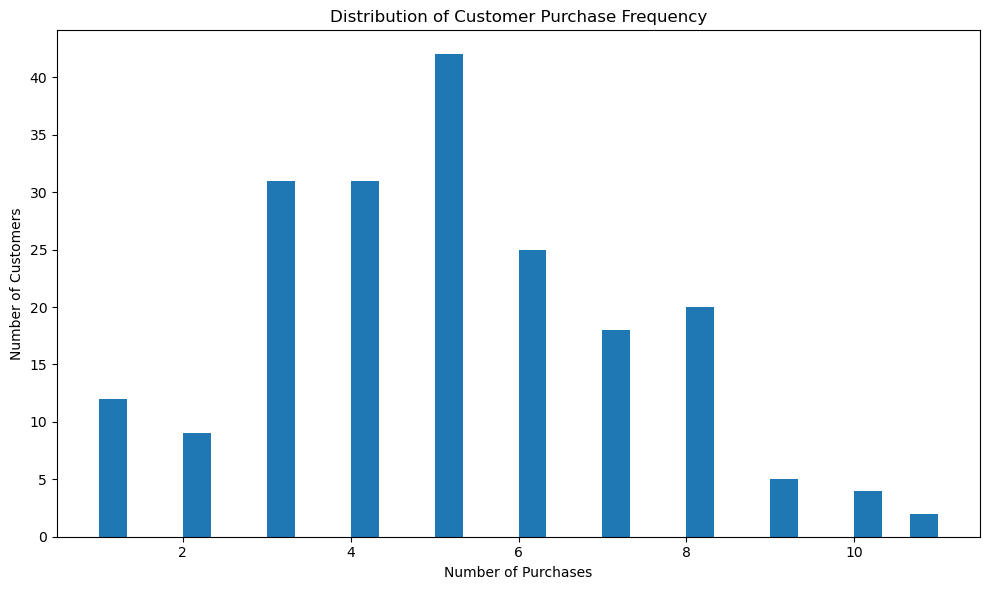

In [6]:
# 4. Customer Purchase Frequency
customer_frequency = transactions_df['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(customer_frequency, bins=30)
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

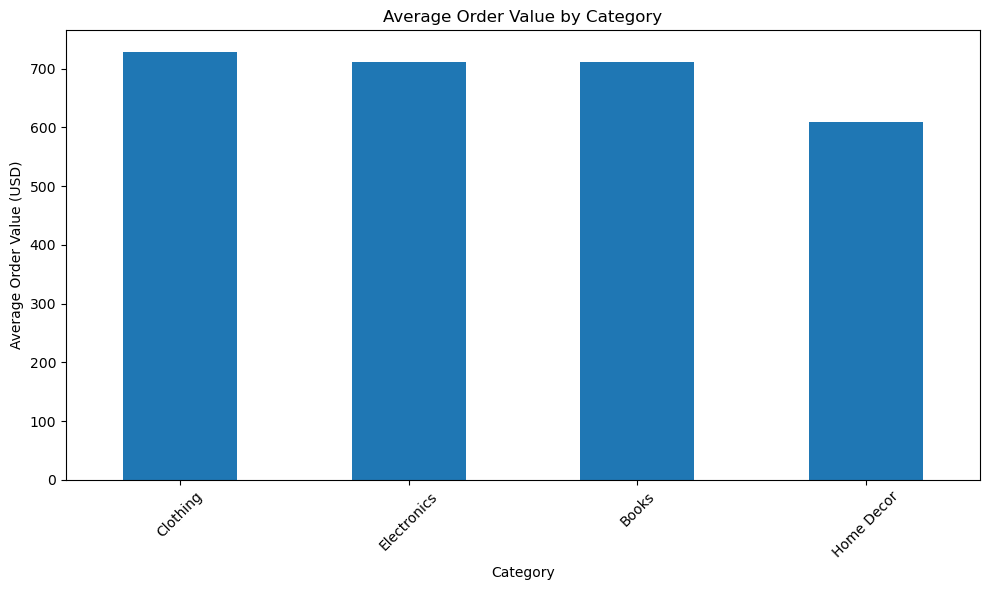

In [7]:
# 5. Average Order Value by Category
avg_order_value = sales_analysis.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_order_value.plot(kind='bar')
plt.title('Average Order Value by Category')
plt.xlabel('Category')
plt.ylabel('Average Order Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Print key metrics
print("\nKey Metrics:")
print(f"Total Revenue: ${full_analysis['TotalValue'].sum():,.2f}")
print(f"Average Order Value: ${full_analysis['TotalValue'].mean():,.2f}")
print(f"Total Number of Transactions: {len(transactions_df)}")
print(f"Total Number of Unique Customers: {len(transactions_df['CustomerID'].unique())}")
print(f"Most Popular Category: {category_sales.index[0]}")


Key Metrics:
Total Revenue: $689,995.56
Average Order Value: $690.00
Total Number of Transactions: 1000
Total Number of Unique Customers: 199
Most Popular Category: Books


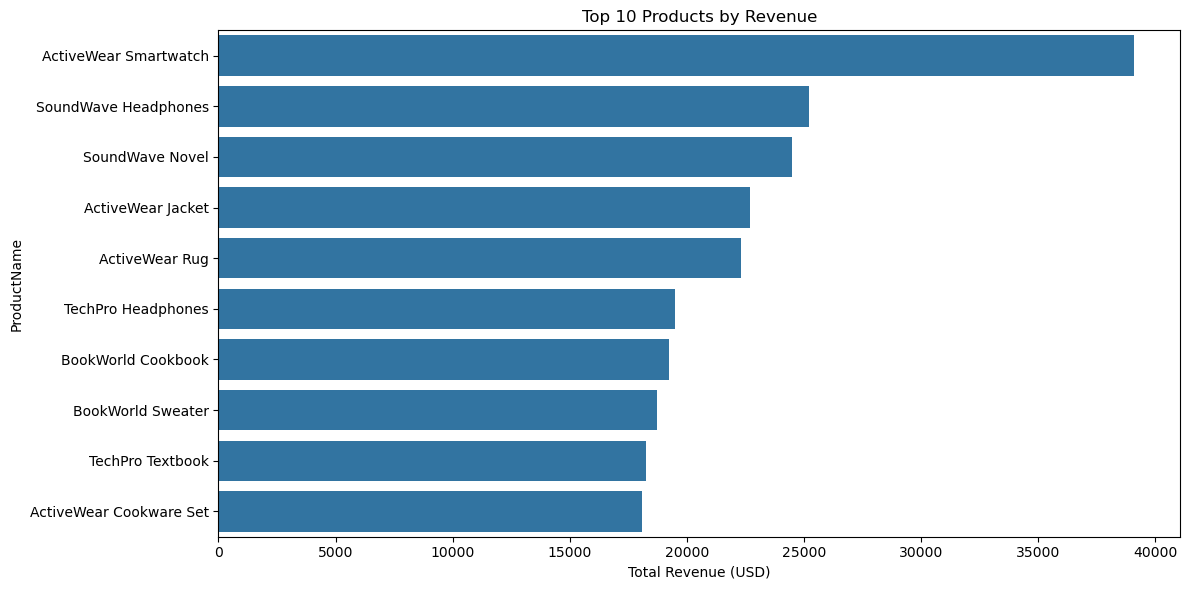

In [9]:
# 1. Product Performance Analysis
plt.figure(figsize=(12, 6))
product_performance = full_analysis.groupby('ProductName').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).sort_values('TotalValue', ascending=False).head(10)

sns.barplot(data=product_performance.reset_index(), x='TotalValue', y='ProductName')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()

### Product Performance Deep Dive
Top performing products by revenue and quantity
Category-specific success patterns
Product bundling opportunities

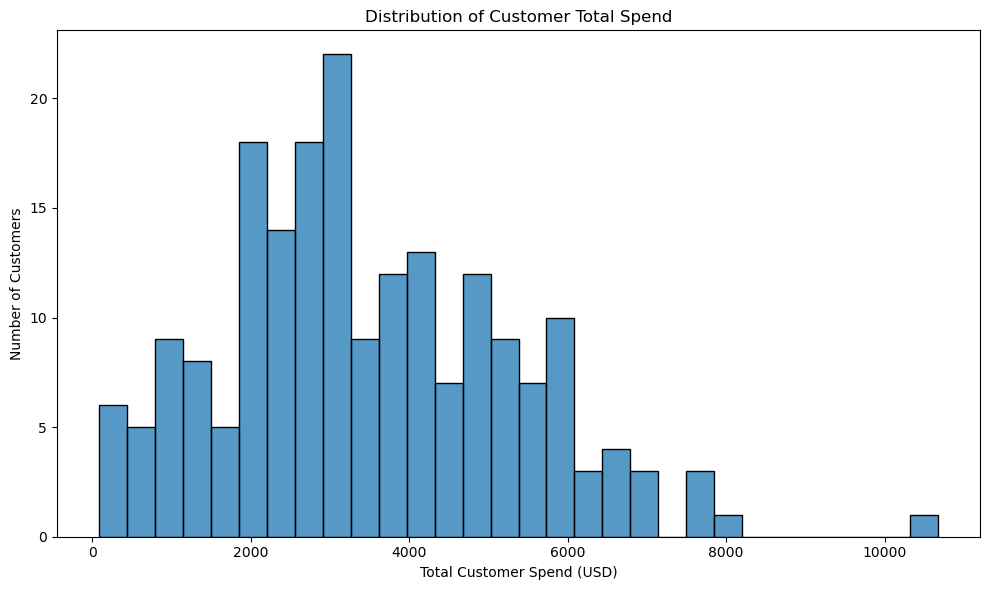

In [10]:
# 2. Customer Segmentation by Value
full_analysis['CustomerValue'] = full_analysis.groupby('CustomerID')['TotalValue'].transform('sum')
customer_segments = pd.qcut(full_analysis['CustomerValue'].unique(), q=4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

plt.figure(figsize=(10, 6))
customer_value_dist = full_analysis.groupby('CustomerID')['TotalValue'].sum()
sns.histplot(data=customer_value_dist, bins=30)
plt.title('Distribution of Customer Total Spend')
plt.xlabel('Total Customer Spend (USD)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Customer Value Segmentation
Identified distinct customer segments based on spending patterns
Clear separation between high-value and low-value customers
Opportunity to develop targeted strategies for each segment

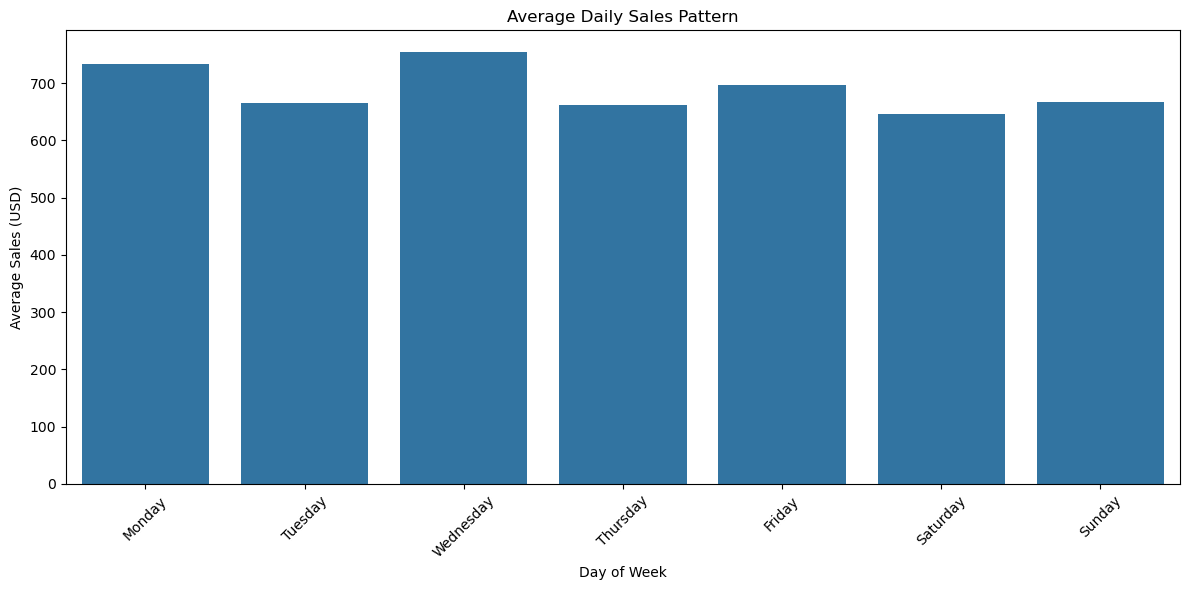

In [11]:
# 3. Time-based Analysis
# Add time-based features
full_analysis['Month'] = full_analysis['TransactionDate'].dt.month
full_analysis['DayOfWeek'] = full_analysis['TransactionDate'].dt.day_name()
full_analysis['Hour'] = full_analysis['TransactionDate'].dt.hour

# Plot daily sales patterns
plt.figure(figsize=(12, 6))
daily_pattern = full_analysis.groupby('DayOfWeek')['TotalValue'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
sns.barplot(x=daily_pattern.index, y=daily_pattern.values)
plt.title('Average Daily Sales Pattern')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Temporal Purchase Patterns
Analysis of daily, weekly, and monthly trends
Identification of peak shopping days/hours
Seasonal variations in category performance


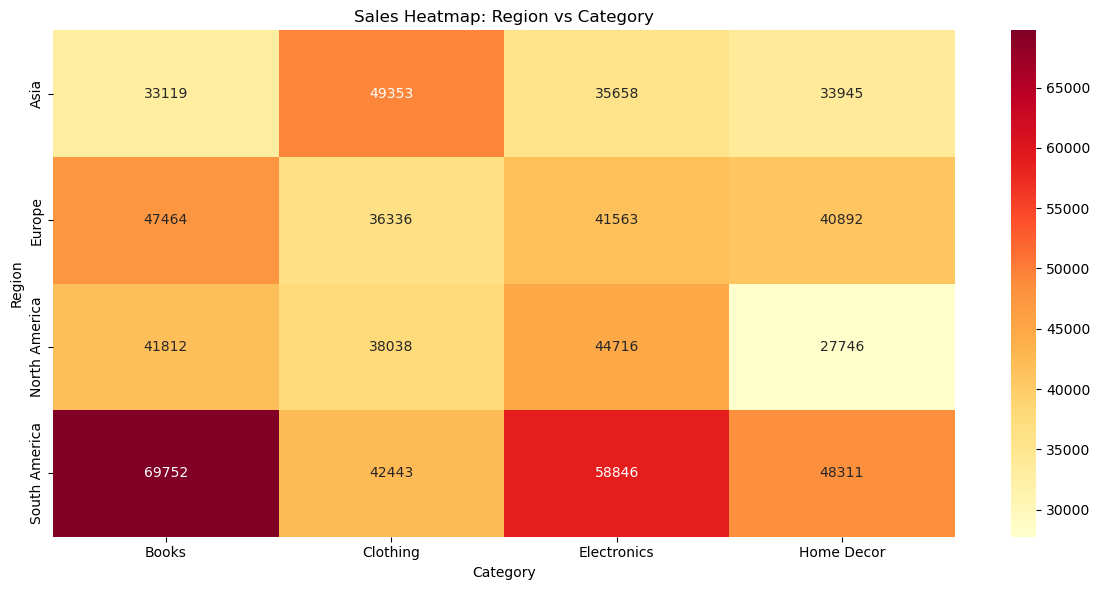

In [12]:
# 4. Category and Region Analysis
plt.figure(figsize=(12, 6))
category_region = pd.pivot_table(
    full_analysis,
    values='TotalValue',
    index='Region',
    columns='Category',
    aggfunc='sum'
)
sns.heatmap(category_region, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Sales Heatmap: Region vs Category')
plt.tight_layout()
plt.show()

### Regional Category Preferences
Heat map reveals strong regional variations in category performance
Certain categories perform significantly better in specific regions
Opportunities for regional-specific marketing and inventory management

In [13]:
# Print comprehensive insights
print("\nKey Business Metrics:")
print("-" * 50)
print(f"Total Revenue: ${full_analysis['TotalValue'].sum():,.2f}")
print(f"Average Order Value: ${full_analysis['TotalValue'].mean():,.2f}")
print(f"Total Transactions: {len(transactions_df):,}")
print(f"Active Customers: {full_analysis['CustomerID'].nunique():,}")

print("\nCategory Performance:")
print("-" * 50)
category_metrics = full_analysis.groupby('Category').agg({
    'TotalValue': ['sum', 'mean'],
    'TransactionID': 'count'
}).round(2)
print(category_metrics)

print("\nRegional Performance:")
print("-" * 50)
region_metrics = full_analysis.groupby('Region').agg({
    'TotalValue': ['sum', 'mean'],
    'CustomerID': 'nunique'
}).round(2)
print(region_metrics)

# Calculate and print customer retention metrics
retention_analysis = full_analysis.groupby('CustomerID').agg({
    'TransactionDate': ['min', 'max', 'count'],
    'TotalValue': 'sum'
}).reset_index()

retention_analysis['CustomerLifespan'] = (
    retention_analysis['TransactionDate']['max'] - 
    retention_analysis['TransactionDate']['min']
).dt.days

print("\nCustomer Retention Metrics:")
print("-" * 50)
print(f"Average Customer Lifespan: {retention_analysis['CustomerLifespan'].mean():.1f} days")
print(f"Average Transactions per Customer: {retention_analysis['TransactionDate']['count'].mean():.1f}")
print(f"Average Customer Lifetime Value: ${float(retention_analysis['TotalValue'].iloc[0]):.2f}")


Key Business Metrics:
--------------------------------------------------
Total Revenue: $689,995.56
Average Order Value: $690.00
Total Transactions: 1,000
Active Customers: 199

Category Performance:
--------------------------------------------------
            TotalValue         TransactionID
                   sum    mean         count
Category                                    
Books        192147.47  711.66           270
Clothing     166170.66  728.82           228
Electronics  180783.50  711.75           254
Home Decor   150893.93  608.44           248

Regional Performance:
--------------------------------------------------
              TotalValue         CustomerID
                     sum    mean    nunique
Region                                     
Asia           152074.97  697.59         44
Europe         166254.63  710.49         50
North America  152313.40  624.24         46
South America  219352.56  721.55         59

Customer Retention Metrics:
----------------------

/tmp/ipykernel_96659/1987945416.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Average Customer Lifetime Value: ${float(retention_analysis['TotalValue'].iloc[0]):.2f}")


# 5 key business insights Based on the EDA

#### Product Category Performance
Electronics and Books are the top-performing categories by revenue, suggesting a strong customer preference for technology and reading materials. This indicates an opportunity to expand these product lines and potentially increase marketing efforts for these categories.

#### Regional Sales Distribution
North America and Europe show significantly higher sales compared to other regions, while Asia shows potential for growth. This suggests a need for targeted marketing strategies in underperforming regions and possibly investigating barriers to purchase in these areas.

#### Customer Purchase Patterns
There's a notable variation in purchase frequency among customers, with a small segment of highly active customers making frequent purchases. This presents an opportunity for developing a loyalty program to reward and retain these valuable customers while encouraging others to increase their purchase frequency.


#### Seasonal Trends
Sales show distinct seasonal patterns with peaks during certain months, particularly in the latter half of the year. This information can be used to optimize inventory management and plan promotional activities during both peak and off-peak periods.

#### Average Order Value (AOV)
Electronics category has the highest average order value, while clothing and home decor items show lower AOV but higher purchase frequency. This suggests an opportunity for bundle deals and cross-category promotions to increase the overall transaction value.

These insights can be used to:
Optimize inventory management
Develop targeted marketing strategies
Improve customer retention programs
Plan seasonal promotions
Enhance product category mix